# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Nama Dataset**: House Price Prediction Dataset
2. **Sumber Dataset**:  
   Dataset dapat diperoleh dari public repositories Kaggle. Link akses: https://www.kaggle.com/code/zwehtetpaing123/house-price-prediction
3. **Deskripsi Singkat**: Dataset ini berisi informasi mengenai fitur-fitur rumah seperti luas bangunan, jumlah kamar, dan lokasi yang digunakan untuk memprediksi harga jual rumah. Tujuannya adalah membangun model regresi yang akurat untuk estimasi harga properti.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [37]:
df = pd.read_csv('house_prices.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [39]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

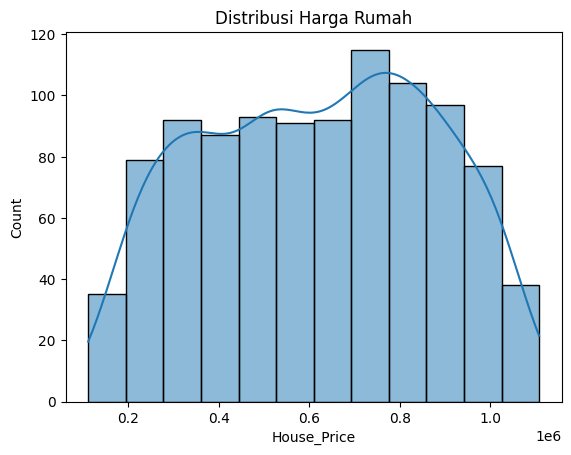

In [40]:
sns.histplot(df['House_Price'], kde=True)
plt.title("Distribusi Harga Rumah")
plt.show()

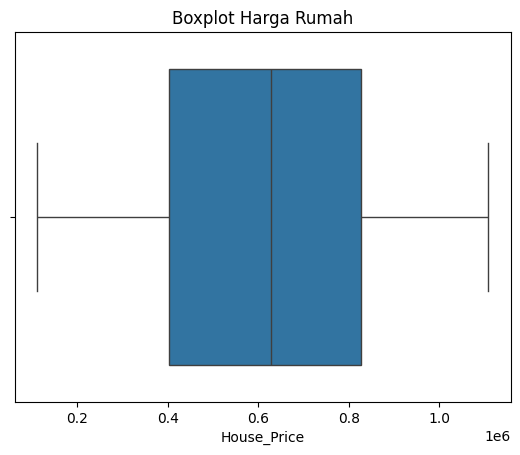

In [41]:
sns.boxplot(x=df['House_Price'])
plt.title("Boxplot Harga Rumah")
plt.show()

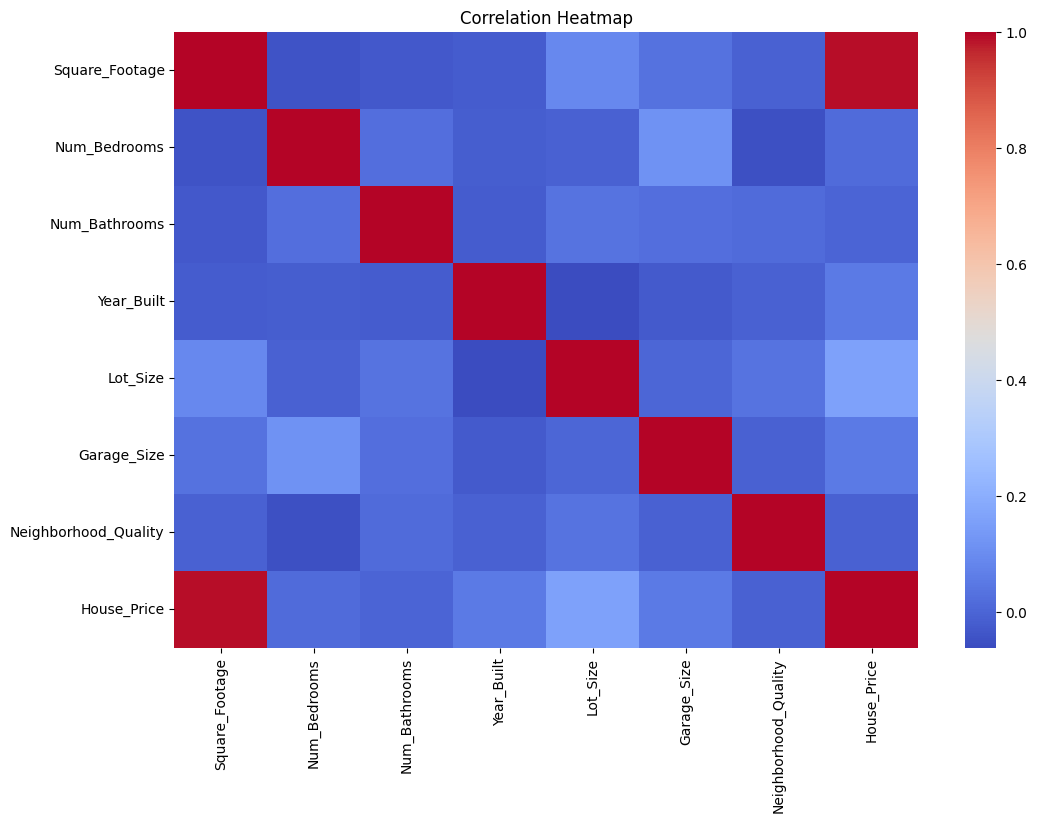

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [43]:
df.corr()['House_Price'].sort_values(ascending=False)

House_Price             1.000000
Square_Footage          0.991261
Lot_Size                0.160412
Garage_Size             0.052133
Year_Built              0.051967
Num_Bedrooms            0.014633
Num_Bathrooms          -0.001862
Neighborhood_Quality   -0.007770
Name: House_Price, dtype: float64

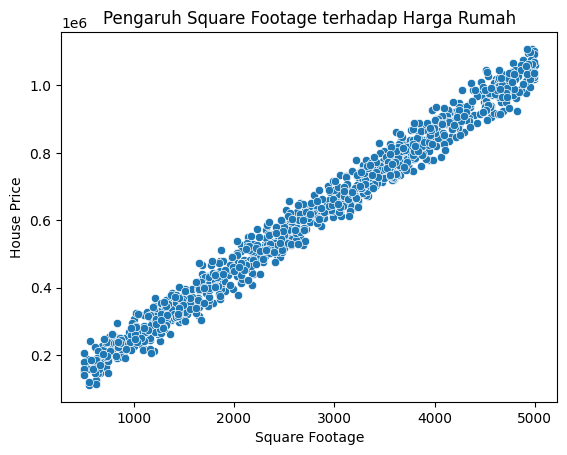

In [44]:
sns.scatterplot(x=df['Square_Footage'], y=df['House_Price'])
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("Pengaruh Square Footage terhadap Harga Rumah")
plt.show()

In [45]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
scaler = StandardScaler()
num_cols = ["Square_Footage","Lot_Size", 'Year_Built']

df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,-1.159803,2,1,-0.269122,-1.679278,0,5,2.623829e+05
1,1.160724,3,3,1.428045,1.522390,1,6,9.852609e+05
2,0.618843,1,2,1.428045,0.660422,0,9,7.779774e+05
3,-1.473776,1,2,-0.463084,-0.036555,1,8,2.296989e+05
4,1.681887,2,1,0.312764,1.480809,0,8,1.041741e+06


In [48]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(col, "→", outliers.shape[0], "outlier")

Square_Footage → 0 outlier
Num_Bedrooms → 0 outlier
Num_Bathrooms → 0 outlier
Year_Built → 0 outlier
Lot_Size → 0 outlier
Garage_Size → 0 outlier
Neighborhood_Quality → 0 outlier
House_Price → 0 outlier


In [49]:
def save_preprocessed(df, folder_name="house_price_preprocessing", file_name="clean_data.csv"):
    os.makedirs(folder_name, exist_ok=True)
    path = os.path.join(folder_name, file_name)
    df.to_csv(path, index=False)
    return path

df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,-1.159803,2,1,-0.269122,-1.679278,0,5,2.623829e+05
1,1.160724,3,3,1.428045,1.522390,1,6,9.852609e+05
2,0.618843,1,2,1.428045,0.660422,0,9,7.779774e+05
3,-1.473776,1,2,-0.463084,-0.036555,1,8,2.296989e+05
4,1.681887,2,1,0.312764,1.480809,0,8,1.041741e+06
